<a href="https://colab.research.google.com/github/morenourey/CHAT/blob/main/ML_1_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 1 - PREPROCESSING

# Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

In [ ]:
pip install catboost

# Importar train data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NUCLIO/telecom_churn_TRAINTEST.csv')

In [ ]:
df.info()

In [ ]:
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
for columna in columnas_categoricas:
    print(df[columna].value_counts().to_string().replace('\n', '\n\t'))
    print("\n")

new_cell
	U    58812
	Y    18114
	N    13074


crclscod
	AA    34152
	A     15602
	BA    11270
	CA     7389
	EA     5521
	B      3743
	DA     3201
	ZA     3177
	C      1418
	A2      771
	U       429
	E       330
	E4      305
	GA      265
	D       244
	G       236
	I       231
	JF      192
	Z       187
	J       169
	M       153
	C2      152
	D4      107
	Z4       94
	K        93
	W        84
	V1       70
	U1       56
	EM       46
	B2       42
	Y        38
	EC       32
	O        24
	CY       21
	E2       19
	CC       19
	D5       16
	C5       14
	IF       14
	ZY       12
	Z1       11
	Z5        8
	H         8
	TP        5
	D2        5
	GY        5
	L         4
	EF        4
	Z2        4
	A3        3
	P1        2
	S         1
	V         1
	ZF        1


asl_flag
	N    79401
	Y    10599


prizm_social_one
	S    29203
	U    20935
	C    15244
	T    13705
	R     4376


area
	NEW YORK CITY AREA               10293
	DC/MARYLAND/VIRGINIA AREA         5924
	MIDWEST AREA                      5891
	

In [ ]:
df_churn_cat = df.select_dtypes(include=['object'])

In [ ]:
df_churn_cat.info()

In [ ]:
# rellenar
def fill_na(df_churn_cat, columnas_rellenar):
    for col in columnas_rellenar:
        # Proporciones calculadas
        value_counts = df_churn_cat[col].value_counts(normalize=True)

        # Lista de valores para rellenar
        fill_values = np.random.choice(value_counts.index, size=df_churn_cat[col].isna().sum(), p=value_counts.values)

        # Rellenando los nulos
        df_churn_cat.loc[df_churn_cat[col].isna(), col] = fill_values

    return df_churn_cat

# Columnas a rellenar
columnas_rellenar = ['ownrent', 'dwlltype', 'HHstatin', 'dwllsize', 'prizm_social_one', 'hnd_webcap']

# Rellenando
df_churn_cat = fill_na(df_churn_cat, columnas_rellenar)

In [ ]:
df_churn_cat.info()

In [ ]:
del df_churn_cat['infobase']

In [ ]:
# Ver de entre las columnas con 3 categorias, si alguna una de ellas es poco significativas
for col in df_churn_cat.columns[df_churn_cat.nunique() == 3]:
    print(df_churn_cat[col].value_counts(normalize = True)*100, '\n')

new_cell
U    65.363583
Y    20.121345
N    14.515072
Name: proportion, dtype: float64 

hnd_webcap
WCMB    83.781127
WC      15.973697
UNKW     0.245176
Name: proportion, dtype: float64 



In [ ]:
df_churn_cat['hnd_webcap'] = df_churn_cat['hnd_webcap'].apply(lambda x: None if x == 'UNKW' else  x )

In [ ]:
df_churn_cat['hnd_webcap'].value_counts(normalize = True)*100

hnd_webcap
WCMB    83.987043
WC      16.012957
Name: proportion, dtype: float64

In [ ]:
columnas_booleanas.append('hnd_webcap')

In [ ]:
df_churn_cat.dropna(inplace=True)

In [ ]:
df_churn_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88291 entries, 0 to 89999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_cell          88291 non-null  object
 1   crclscod          88291 non-null  object
 2   asl_flag          88291 non-null  object
 3   prizm_social_one  88291 non-null  object
 4   area              88291 non-null  object
 5   dualband          88291 non-null  object
 6   refurb_new        88291 non-null  object
 7   hnd_webcap        88291 non-null  object
 8   ownrent           88291 non-null  object
 9   dwlltype          88291 non-null  object
 10  marital           88291 non-null  object
 11  HHstatin          88291 non-null  object
 12  dwllsize          88291 non-null  object
 13  ethnic            88291 non-null  object
 14  kid0_2            88291 non-null  object
 15  kid3_5            88291 non-null  object
 16  kid6_10           88291 non-null  object
 17  kid11_15         

In [ ]:
columnas_booleanas = df_churn_cat.columns[df_churn_cat.nunique() == 2].to_list()
columnas_booleanas

['asl_flag',
 'refurb_new',
 'hnd_webcap',
 'ownrent',
 'dwlltype',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

In [ ]:
for col in columnas_booleanas:
    label_encoder = LabelEncoder()
    df_churn_cat[col] = label_encoder.fit_transform(df_churn_cat[col])

In [ ]:
df_churn_cat[columnas_booleanas].nunique()

asl_flag      2
refurb_new    2
hnd_webcap    2
ownrent       2
dwlltype      2
kid0_2        2
kid3_5        2
kid6_10       2
kid11_15      2
kid16_17      2
creditcd      2
dtype: int64

In [ ]:
df_churn_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88291 entries, 0 to 89999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_cell          88291 non-null  object
 1   crclscod          88291 non-null  object
 2   asl_flag          88291 non-null  int64 
 3   prizm_social_one  88291 non-null  object
 4   area              88291 non-null  object
 5   dualband          88291 non-null  object
 6   refurb_new        88291 non-null  int64 
 7   hnd_webcap        88291 non-null  int64 
 8   ownrent           88291 non-null  int64 
 9   dwlltype          88291 non-null  int64 
 10  marital           88291 non-null  object
 11  HHstatin          88291 non-null  object
 12  dwllsize          88291 non-null  object
 13  ethnic            88291 non-null  object
 14  kid0_2            88291 non-null  int64 
 15  kid3_5            88291 non-null  int64 
 16  kid6_10           88291 non-null  int64 
 17  kid11_15         

In [ ]:
columnas_booleanas = df_churn_cat.columns[df_churn_cat.nunique() == 2].to_list()
columnas_booleanas

In [ ]:
columnas_object = df_churn_cat.select_dtypes(include=['object'])
columnas_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88291 entries, 0 to 89999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_cell          88291 non-null  object
 1   crclscod          88291 non-null  object
 2   prizm_social_one  88291 non-null  object
 3   area              88291 non-null  object
 4   dualband          88291 non-null  object
 5   marital           88291 non-null  object
 6   HHstatin          88291 non-null  object
 7   dwllsize          88291 non-null  object
 8   ethnic            88291 non-null  object
dtypes: object(9)
memory usage: 6.7+ MB


In [ ]:
columnas_object = df_churn_cat.select_dtypes(include=['object']).columns.tolist()
for columna in columnas_object:
    print(df[columna].value_counts(normalize = True).cumsum()*100, df[columna].value_counts(normalize = True)*100, '\n')
    print("\n")

new_cell
U     65.346667
Y     85.473333
N    100.000000
Name: proportion, dtype: float64 new_cell
U    65.346667
Y    20.126667
N    14.526667
Name: proportion, dtype: float64 



crclscod
AA     37.946667
A      55.282222
BA     67.804444
CA     76.014444
EA     82.148889
B      86.307778
DA     89.864444
ZA     93.394444
C      94.970000
A2     95.826667
U      96.303333
E      96.670000
E4     97.008889
GA     97.303333
D      97.574444
G      97.836667
I      98.093333
JF     98.306667
Z      98.514444
J      98.702222
M      98.872222
C2     99.041111
D4     99.160000
Z4     99.264444
K      99.367778
W      99.461111
V1     99.538889
U1     99.601111
EM     99.652222
B2     99.698889
Y      99.741111
EC     99.776667
O      99.803333
CY     99.826667
E2     99.847778
CC     99.868889
D5     99.886667
C5     99.902222
IF     99.917778
ZY     99.931111
Z1     99.943333
Z5     99.952222
H      99.961111
TP     99.966667
D2     99.972222
GY     99.977778
L      99.982222
EF     99.9

In [ ]:
# columna: crl < 1%, dwllsize < 1%, ethnic <1%
for columna in  ['crclscod','dwllsize', 'ethnic' ]:
  value_counts = df_churn_cat[columna].value_counts(normalize = True)
  limite = 0.01
  valores_filtrados = value_counts[value_counts > limite].index

  df_churn_cat[columna] = df_churn_cat[columna].apply(lambda x: x if x in valores_filtrados else 'otros')


In [ ]:
for col in ['crclscod','dwllsize', 'ethnic']:
    print(df_churn_cat[ col ].value_counts(normalize = True),'\n\n')

crclscod
AA       0.381681
A        0.175363
BA       0.125132
CA       0.082081
EA       0.061739
otros    0.044806
B        0.042088
DA       0.035723
ZA       0.035440
C        0.015947
Name: proportion, dtype: float64 


dwllsize
A        0.767383
B        0.084448
otros    0.044569
C        0.024079
J        0.022177
O        0.018960
N        0.015653
D        0.012244
K        0.010488
Name: proportion, dtype: float64 


ethnic
N        0.343127
H        0.135246
S        0.131225
U        0.112718
G        0.061648
Z        0.044965
O        0.043107
I        0.039630
J        0.029663
F        0.021848
B        0.014464
otros    0.011655
R        0.010703
Name: proportion, dtype: float64 




In [ ]:
df_churn_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88291 entries, 0 to 89999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_cell          88291 non-null  object
 1   crclscod          88291 non-null  object
 2   asl_flag          88291 non-null  int64 
 3   prizm_social_one  88291 non-null  object
 4   area              88291 non-null  object
 5   dualband          88291 non-null  object
 6   refurb_new        88291 non-null  int64 
 7   hnd_webcap        88291 non-null  int64 
 8   ownrent           88291 non-null  int64 
 9   dwlltype          88291 non-null  int64 
 10  marital           88291 non-null  object
 11  HHstatin          88291 non-null  object
 12  dwllsize          88291 non-null  object
 13  ethnic            88291 non-null  object
 14  kid0_2            88291 non-null  int64 
 15  kid3_5            88291 non-null  int64 
 16  kid6_10           88291 non-null  int64 
 17  kid11_15         

# EDA: Analisis Exploratorio

In [ ]:
df_churn_num = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
df_churn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev          89866 non-null  float64
 1   mou          89866 non-null  float64
 2   totmrc       89866 non-null  float64
 3   da           89866 non-null  float64
 4   ovrmou       89866 non-null  float64
 5   ovrrev       89866 non-null  float64
 6   vceovr       89866 non-null  float64
 7   datovr       89866 non-null  float64
 8   roam         89866 non-null  float64
 9   change_mou   89405 non-null  float64
 10  change_rev   89405 non-null  float64
 11  drop_vce     90000 non-null  float64
 12  drop_dat     90000 non-null  float64
 13  blck_vce     90000 non-null  float64
 14  blck_dat     90000 non-null  float64
 15  unan_vce     90000 non-null  float64
 16  unan_dat     90000 non-null  float64
 17  plcd_vce     90000 non-null  float64
 18  plcd_dat     90000 non-null  float64
 19  recv

In [ ]:
# rellenar
def fill_na(df_churn_num, columnas_rellenar):
    for col in columnas_rellenar:
        # Proporciones calculadas
        value_counts = df_churn_num[col].value_counts(normalize=True)

        # Lista de valores para rellenar
        fill_values = np.random.choice(value_counts.index, size=df_churn_num[col].isna().sum(), p=value_counts.values)

        # Rellenando los nulos
        df_churn_num.loc[df_churn_num[col].isna(), col] = fill_values

    return df_churn_num

# Columnas a rellenar
columnas_rellenar = ['lor', 'adults', 'income', 'numbcars']

# Rellenando
df_churn_num = fill_na(df_churn_num, columnas_rellenar)

In [ ]:
df_churn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev          89866 non-null  float64
 1   mou          89866 non-null  float64
 2   totmrc       89866 non-null  float64
 3   da           89866 non-null  float64
 4   ovrmou       89866 non-null  float64
 5   ovrrev       89866 non-null  float64
 6   vceovr       89866 non-null  float64
 7   datovr       89866 non-null  float64
 8   roam         89866 non-null  float64
 9   change_mou   89405 non-null  float64
 10  change_rev   89405 non-null  float64
 11  drop_vce     90000 non-null  float64
 12  drop_dat     90000 non-null  float64
 13  blck_vce     90000 non-null  float64
 14  blck_dat     90000 non-null  float64
 15  unan_vce     90000 non-null  float64
 16  unan_dat     90000 non-null  float64
 17  plcd_vce     90000 non-null  float64
 18  plcd_dat     90000 non-null  float64
 19  recv

In [ ]:
df_churn_num.dropna(inplace=True)

In [ ]:
df_churn_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85963 entries, 0 to 89998
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev          85963 non-null  float64
 1   mou          85963 non-null  float64
 2   totmrc       85963 non-null  float64
 3   da           85963 non-null  float64
 4   ovrmou       85963 non-null  float64
 5   ovrrev       85963 non-null  float64
 6   vceovr       85963 non-null  float64
 7   datovr       85963 non-null  float64
 8   roam         85963 non-null  float64
 9   change_mou   85963 non-null  float64
 10  change_rev   85963 non-null  float64
 11  drop_vce     85963 non-null  float64
 12  drop_dat     85963 non-null  float64
 13  blck_vce     85963 non-null  float64
 14  blck_dat     85963 non-null  float64
 15  unan_vce     85963 non-null  float64
 16  unan_dat     85963 non-null  float64
 17  plcd_vce     85963 non-null  float64
 18  plcd_dat     85963 non-null  float64
 19  recv_vce 

In [ ]:
df_churn_num

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
0,23.9975,219.25,22.50,0.2475,0.00,0.000,0.0,0.000,0.0000,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.000000,52.333333,0.000000,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,15.0,1.0,4.0,3.0,0.0,361.0,1000001
2,16.9900,10.25,16.99,0.0000,0.00,0.000,0.0,0.000,0.0000,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.000000,9.000000,0.000000,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999,2.0,1.0,0.0,0.0,7.0,2.0,5.0,2.0,0.0,1504.0,1000003
3,38.0000,7.50,38.00,0.0000,0.00,0.000,0.0,0.000,0.0000,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.666667,0.000000,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999,1.0,1.0,0.0,0.0,6.0,4.0,6.0,1.0,0.0,1812.0,1000004
4,55.2300,570.50,71.98,0.0000,0.00,0.000,0.0,0.000,0.0000,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.000000,222.333333,0.000000,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,0.0,0.0,5.0,1.0,6.0,1.0,0.0,434.0,1000005
5,82.2750,1312.25,75.00,1.2375,0.00,0.000,0.0,0.000,0.0000,156.75,8.1450,52.000000,0.0,7.666667,0.0,76.000000,0.000000,702.000000,0.000000,365.000000,0.0,577.333333,0.0,4.333333,11.000000,7.753333,301.666667,1.333333,369.536667,0.0,200.320000,370.333333,243.213333,147.000000,85.146667,555.666667,0.0,382.096667,0.0,303.666667,0.0,187.760000,0.0,59.666667,702.000000,577.333333,0.0,22.666667,0,59,2,2,26812,40869.00000,4033.98,3932.90,40295.00,26362,83.68,857.34,560.89,1260,960,80,1187.0,853.0,78.0,129.98999,9.0,4.0,0.0,0.0,1.0,1.0,6.0,1.0,0.0,458.0,1000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,21.9475,140.00,10.00,0.2475,29.25,11.700,11.7,0.000,0.0000,123.00,-4.9575,1.000000,0.0,1.333333,0.0,4.666667,0.333333,25.333333,0.333333,4.666667,0.0,18.333333,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,19.100000,0.0,10.856667,4.666667,3.126667,2.000000,8.566667,12.666667,0.0,16.950000,0.0,10.333333,0.0,13.006667,0.0,2.333333,25.666667,18.333333,0.0,0.333333,1,11,2,2,414

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_churn_num)
df_churn_num = pd.DataFrame(X_scaled, columns=df_churn_num.columns)

In [ ]:
del df_churn_num['Customer_ID']



In [ ]:
df_churn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85963 entries, 0 to 85962
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rev         85963 non-null  float64
 1   mou         85963 non-null  float64
 2   totmrc      85963 non-null  float64
 3   da          85963 non-null  float64
 4   ovrmou      85963 non-null  float64
 5   ovrrev      85963 non-null  float64
 6   vceovr      85963 non-null  float64
 7   datovr      85963 non-null  float64
 8   roam        85963 non-null  float64
 9   change_mou  85963 non-null  float64
 10  change_rev  85963 non-null  float64
 11  drop_vce    85963 non-null  float64
 12  drop_dat    85963 non-null  float64
 13  blck_vce    85963 non-null  float64
 14  blck_dat    85963 non-null  float64
 15  unan_vce    85963 non-null  float64
 16  unan_dat    85963 non-null  float64
 17  plcd_vce    85963 non-null  float64
 18  plcd_dat    85963 non-null  float64
 19  recv_vce    85963 non-nul

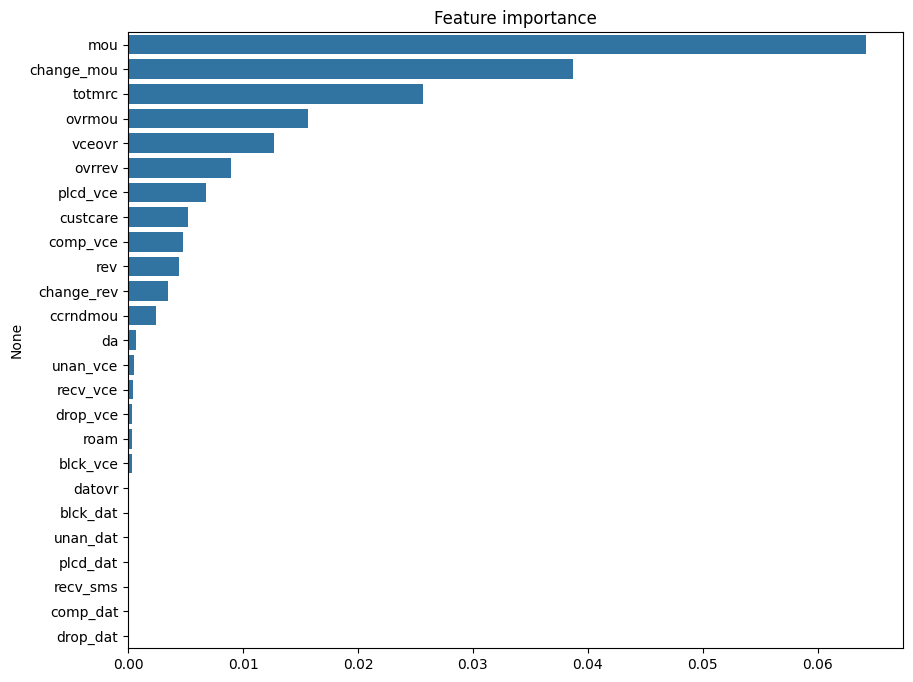

In [ ]:
#feature importance
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}
# se entrena un RandomForest y se plotean las variables que tuvieron más importancia en el modelo
y = df_churn_num['churn']
x = df_churn_num.drop('churn' ,axis=1)
# entrena un RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plotea las 25 mejores Features importances
features = clf.feature_importances_[:25]
columnas = x.columns[:25]
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')
plt.show()

In [ ]:
# se seleccionan las columnas con una importancia mayor a 0.1%
columnas = imp[imp > (0.1)/100].index.to_list()

In [ ]:
print(columnas)

['mou', 'change_mou', 'totmrc', 'ovrmou', 'vceovr', 'ovrrev', 'plcd_vce', 'custcare', 'comp_vce', 'rev', 'change_rev', 'ccrndmou']


In [ ]:
df_churn_num_top12 = df_churn_num[columnas]

In [ ]:
df_churn_num_top12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85963 entries, 0 to 85962
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mou         85963 non-null  float64
 1   change_mou  85963 non-null  float64
 2   totmrc      85963 non-null  float64
 3   ovrmou      85963 non-null  float64
 4   vceovr      85963 non-null  float64
 5   ovrrev      85963 non-null  float64
 6   plcd_vce    85963 non-null  float64
 7   custcare    85963 non-null  float64
 8   comp_vce    85963 non-null  float64
 9   rev         85963 non-null  float64
 10  change_rev  85963 non-null  float64
 11  ccrndmou    85963 non-null  float64
dtypes: float64(12)
memory usage: 7.9 MB


In [ ]:
df_churn_num_top12['churn'] = df_churn_num['churn']

In [ ]:
df_churn_num_top12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85963 entries, 0 to 85962
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mou         85963 non-null  float64
 1   change_mou  85963 non-null  float64
 2   totmrc      85963 non-null  float64
 3   ovrmou      85963 non-null  float64
 4   vceovr      85963 non-null  float64
 5   ovrrev      85963 non-null  float64
 6   plcd_vce    85963 non-null  float64
 7   custcare    85963 non-null  float64
 8   comp_vce    85963 non-null  float64
 9   rev         85963 non-null  float64
 10  change_rev  85963 non-null  float64
 11  ccrndmou    85963 non-null  float64
 12  churn       85963 non-null  float64
dtypes: float64(13)
memory usage: 8.5 MB


## Distribución del target

## Analisis Univariable

* Distribucion de cada variable

## Analisis Variable-Target

* Relacion target-variable

# Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

# Imputación de nulos

* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [ ]:
final_df = pd.concat([df_churn_cat, df_churn_num_top12], axis=1)


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
# Exibir DataFrame final
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84379 entries, 0 to 85962
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   new_cell          84379 non-null  object 
 1   crclscod          84379 non-null  object 
 2   asl_flag          84379 non-null  float64
 3   prizm_social_one  84379 non-null  object 
 4   area              84379 non-null  object 
 5   dualband          84379 non-null  object 
 6   refurb_new        84379 non-null  float64
 7   hnd_webcap        84379 non-null  float64
 8   ownrent           84379 non-null  float64
 9   dwlltype          84379 non-null  float64
 10  marital           84379 non-null  object 
 11  HHstatin          84379 non-null  object 
 12  dwllsize          84379 non-null  object 
 13  ethnic            84379 non-null  object 
 14  kid0_2            84379 non-null  float64
 15  kid3_5            84379 non-null  float64
 16  kid6_10           84379 non-null  float64
 17

In [ ]:
final_df.reset_index(drop=True, inplace=True)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84379 entries, 0 to 84378
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   new_cell          84379 non-null  object 
 1   crclscod          84379 non-null  object 
 2   asl_flag          84379 non-null  float64
 3   prizm_social_one  84379 non-null  object 
 4   area              84379 non-null  object 
 5   dualband          84379 non-null  object 
 6   refurb_new        84379 non-null  float64
 7   hnd_webcap        84379 non-null  float64
 8   ownrent           84379 non-null  float64
 9   dwlltype          84379 non-null  float64
 10  marital           84379 non-null  object 
 11  HHstatin          84379 non-null  object 
 12  dwllsize          84379 non-null  object 
 13  ethnic            84379 non-null  object 
 14  kid0_2            84379 non-null  float64
 15  kid3_5            84379 non-null  float64
 16  kid6_10           84379 non-null  float6

# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [ ]:
# Identificar colunas categóricas
categorical_columns = final_df.select_dtypes(include=['object']).columns

In [ ]:
categorical_columns

Index(['new_cell', 'crclscod', 'prizm_social_one', 'area', 'dualband',
       'marital', 'HHstatin', 'dwllsize', 'ethnic'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# One-Hot Encoding usando pandas
#one_hot_encoded_df = pd.get_dummies(final_df[categorical_columns])

encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(final_df[categorical_columns])

In [ ]:
# Converter os dados codificados para um DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_columns)
one_hot_encoded_df  = pd.DataFrame(encoded_categorical_data, columns=encoded_columns)

In [ ]:
one_hot_encoded_df['churn'] = df_churn_num['churn']

In [ ]:
numerical_columns = final_df.drop(columns=categorical_columns)

In [ ]:
final_df = pd.concat([numerical_columns, one_hot_encoded_df], axis=1)

In [ ]:
# Exibir DataFrame codificado
print("\nDataFrame Codificado:")
one_hot_encoded_df.info()


DataFrame Codificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84379 entries, 0 to 84378
Columns: 124 entries, new_cell_N to ethnic_Z
dtypes: float64(124)
memory usage: 79.8 MB


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84379 entries, 0 to 84378
Columns: 148 entries, asl_flag to ethnic_Z
dtypes: float64(148)
memory usage: 95.3 MB


In [ ]:
final_df.head()

,asl_flag,refurb_new,hnd_webcap,ownrent,dwlltype,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,mou,change_mou,totmrc,ovrmou,vceovr,ovrrev,plcd_vce,custcare,comp_vce,rev,change_rev,ccrndmou,churn,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_A2,crclscod_A3,crclscod_AA,crclscod_B,crclscod_B2,crclscod_BA,crclscod_C,crclscod_C2,crclscod_C5,crclscod_CA,crclscod_CC,crclscod_CY,crclscod_D,crclscod_D2,crclscod_D4,crclscod_D5,crclscod_DA,crclscod_E,crclscod_E2,crclscod_E4,crclscod_EA,crclscod_EC,crclscod_EF,crclscod_EM,crclscod_G,crclscod_GA,crclscod_GY,crclscod_H,crclscod_I,crclscod_IF,crclscod_J,crclscod_JF,crclscod_K,crclscod_M,crclscod_O,crclscod_P1,crclscod_TP,crclscod_U,crclscod_U1,crclscod_V,crclscod_V1,crclscod_W,crclscod_Y,crclscod_Z,crclscod_Z1,crclscod_Z2,crclscod_Z4,crclscod_Z5,crclscod_ZA,crclscod_ZF,crclscod_ZY,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,dualband_N,dualband_T,dualband_Y,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_D,dwllsize_E,dwllsize_F,dwllsize_G,dwllsize_H,dwllsize_I,dwllsize_J,dwllsize_K,dwllsize_L,dwllsize_M,dwllsize_N,dwllsize_O,ethnic_B,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.017961,0.093839,0.113102,0.0,0.0,0.0,0.022863,0.000000,0.023755,0.007758,0.098338,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000840,0.098258,0.100491,0.0,0.0,0.0,0.003932,0.000000,0.003167,0.005937,0.100054,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000614,0.098337,0.148579,0.0,0.0,0.0,0.001602,0.000000,0.001936,0.011395,0.100054,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.046736,0.099492,0.226354,0.0,0.0,0.0,0.097131,0.012833,0.072321,0.015872,0.100054,0.017415,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

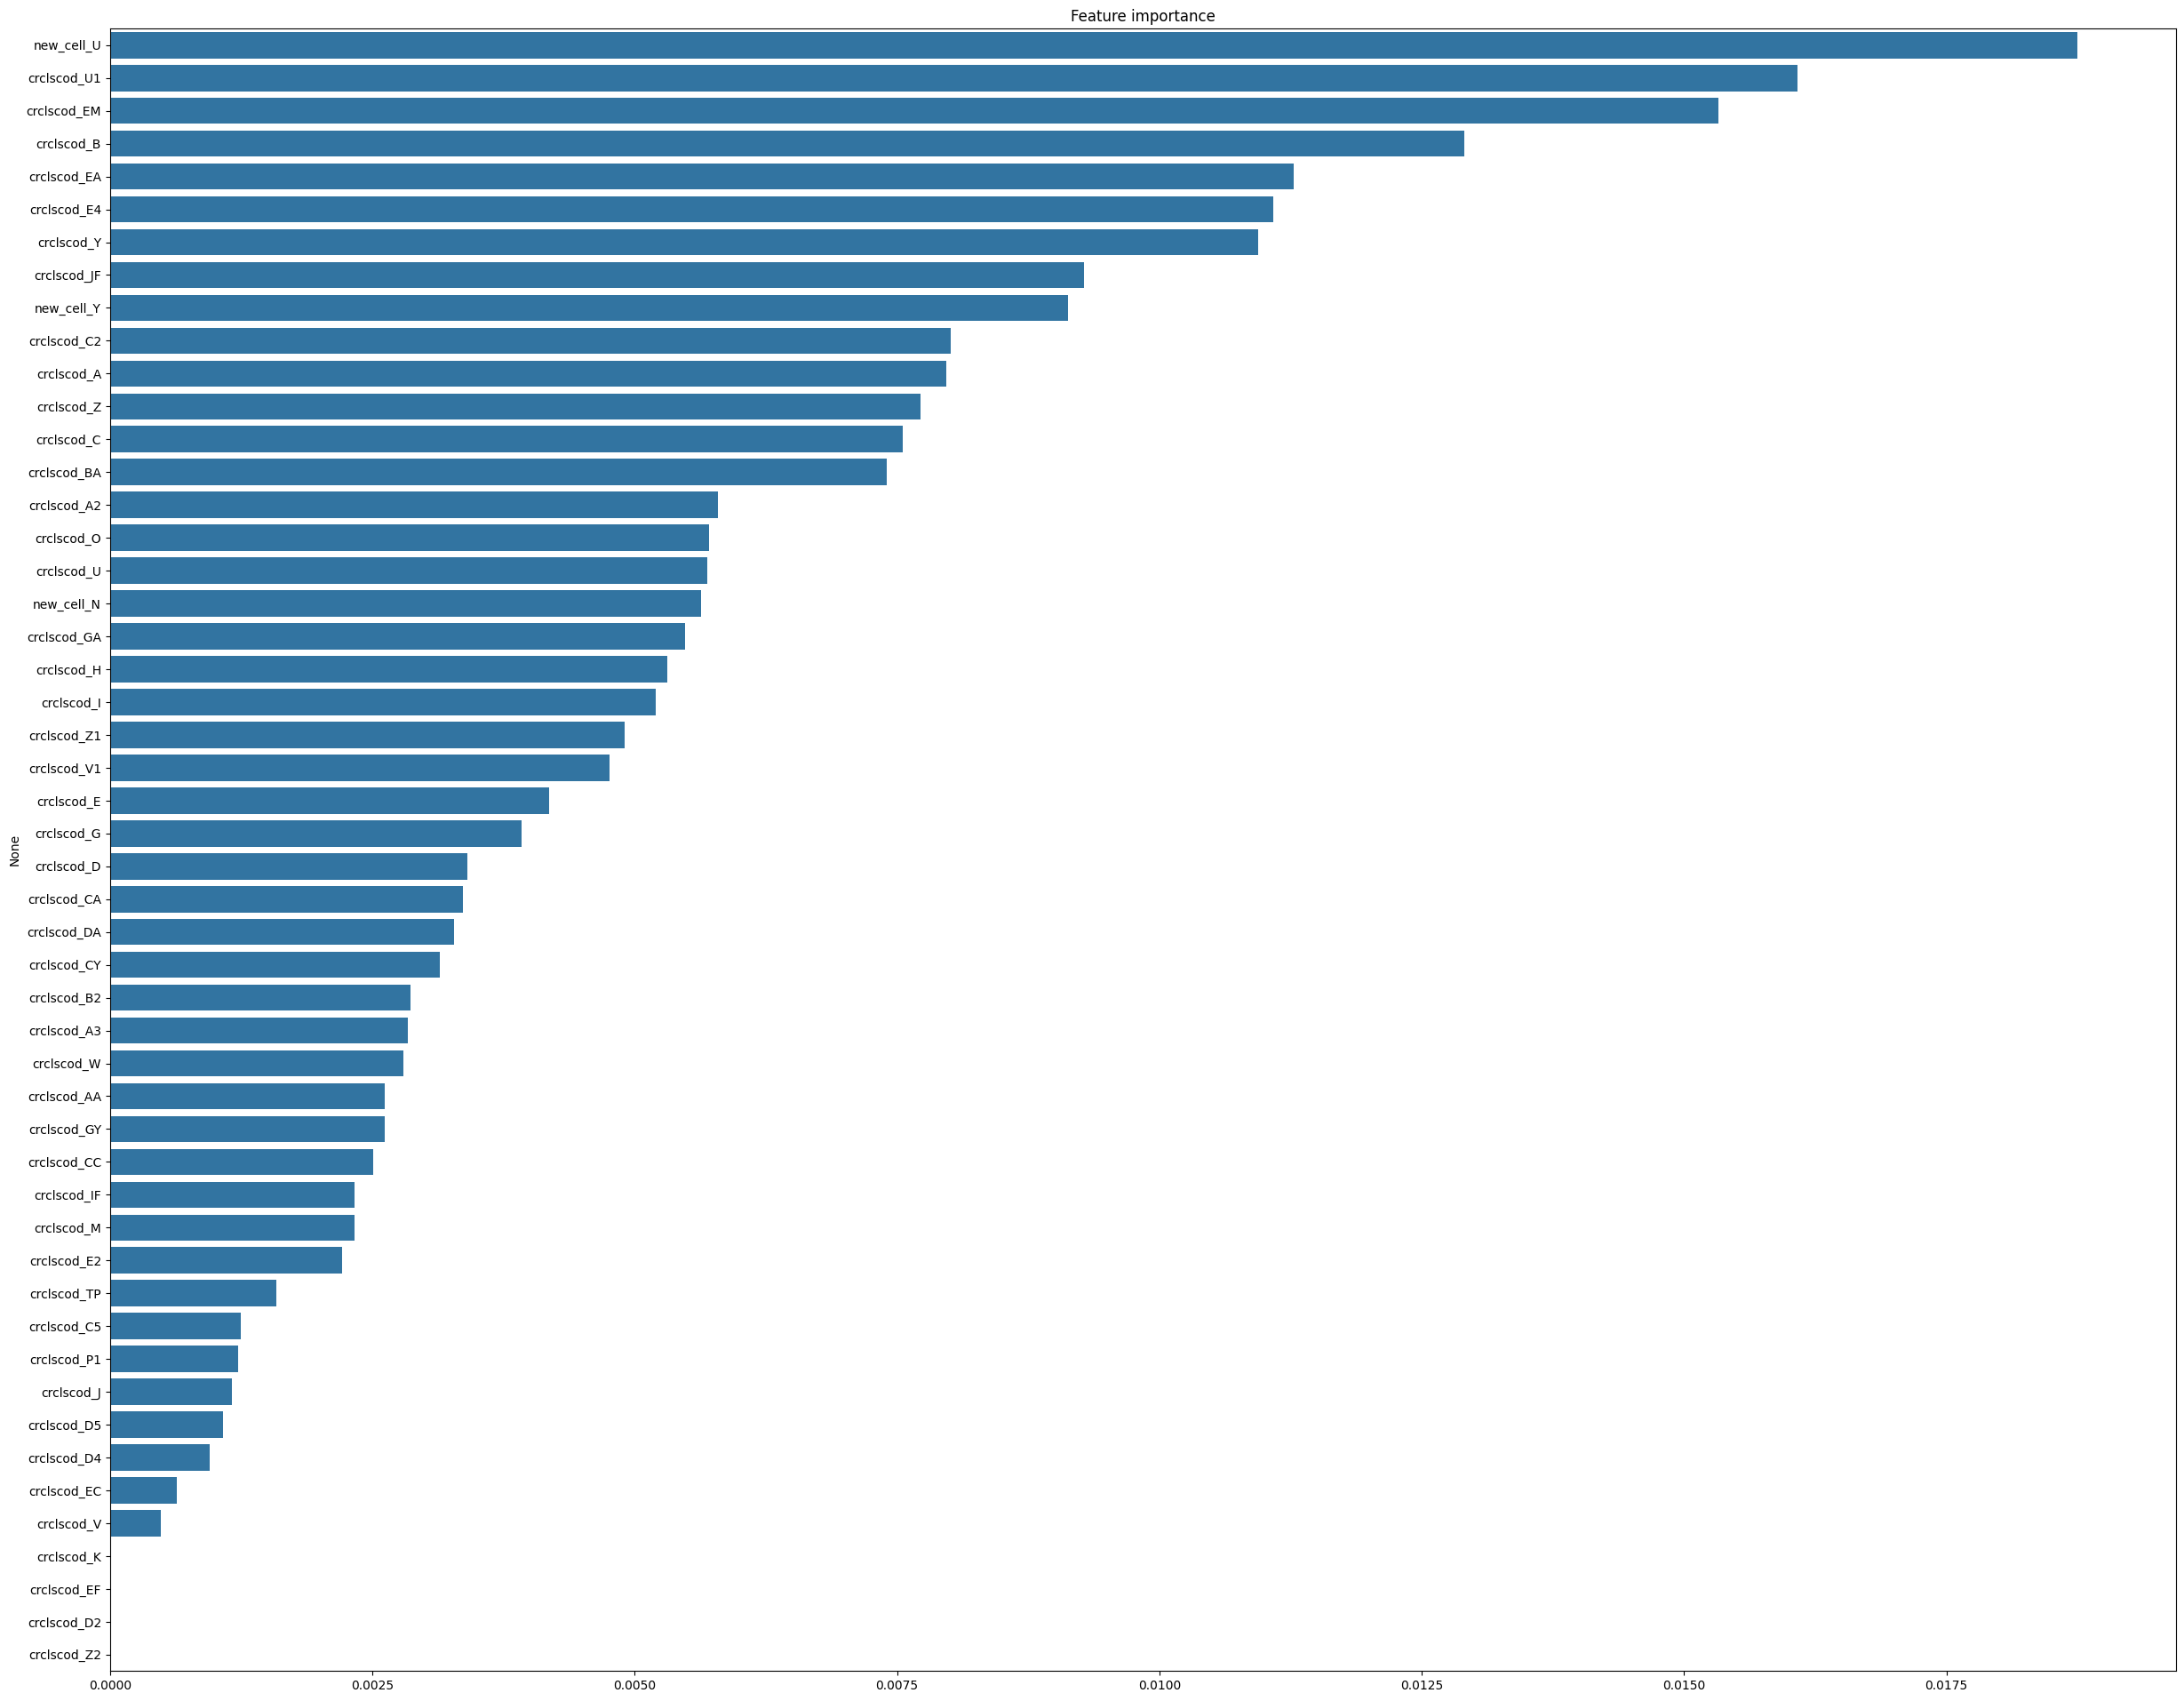

In [ ]:
#feature importance One Hot Encoded Dataset
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}
# se entrena un RandomForest y se plotean las variables que tuvieron más importancia en el modelo
y = one_hot_encoded_df['churn']
x = one_hot_encoded_df.drop('churn' ,axis=1)
# entrena un RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plotea las 25 mejores Features importances
features = clf.feature_importances_[:50]
columnas = x.columns[:50]
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)
plt.figure(figsize=(30,24))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')
plt.show()

In [ ]:
# se seleccionan las columnas con una importancia mayor a 0.1%
columnas = imp[imp > (0.1)/1000].index.to_list()

In [ ]:
print(columnas)

['new_cell_U', 'crclscod_U1', 'crclscod_EM', 'crclscod_B', 'crclscod_EA', 'crclscod_E4', 'crclscod_Y', 'crclscod_JF', 'new_cell_Y', 'crclscod_C2', 'crclscod_A', 'crclscod_Z', 'crclscod_C', 'crclscod_BA', 'crclscod_A2', 'crclscod_O', 'crclscod_U', 'new_cell_N', 'crclscod_GA', 'crclscod_H', 'crclscod_I', 'crclscod_Z1', 'crclscod_V1', 'crclscod_E', 'crclscod_G', 'crclscod_D', 'crclscod_CA', 'crclscod_DA', 'crclscod_CY', 'crclscod_B2', 'crclscod_A3', 'crclscod_W', 'crclscod_AA', 'crclscod_GY', 'crclscod_CC', 'crclscod_IF', 'crclscod_M', 'crclscod_E2', 'crclscod_TP', 'crclscod_C5', 'crclscod_P1', 'crclscod_J', 'crclscod_D5', 'crclscod_D4', 'crclscod_EC', 'crclscod_V']


In [ ]:
one_hot_encoded_clean_df = one_hot_encoded_df[columnas]

In [ ]:
one_hot_encoded_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84379 entries, 0 to 84378
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   new_cell_U   84379 non-null  float64
 1   crclscod_U1  84379 non-null  float64
 2   crclscod_EM  84379 non-null  float64
 3   crclscod_B   84379 non-null  float64
 4   crclscod_EA  84379 non-null  float64
 5   crclscod_E4  84379 non-null  float64
 6   crclscod_Y   84379 non-null  float64
 7   crclscod_JF  84379 non-null  float64
 8   new_cell_Y   84379 non-null  float64
 9   crclscod_C2  84379 non-null  float64
 10  crclscod_A   84379 non-null  float64
 11  crclscod_Z   84379 non-null  float64
 12  crclscod_C   84379 non-null  float64
 13  crclscod_BA  84379 non-null  float64
 14  crclscod_A2  84379 non-null  float64
 15  crclscod_O   84379 non-null  float64
 16  crclscod_U   84379 non-null  float64
 17  new_cell_N   84379 non-null  float64
 18  crclscod_GA  84379 non-null  float64
 19  crcl

In [ ]:
final_df2 = pd.concat([numerical_columns, one_hot_encoded_clean_df], axis=1)

In [ ]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84379 entries, 0 to 84378
Data columns (total 70 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   asl_flag     84379 non-null  float64
 1   refurb_new   84379 non-null  float64
 2   hnd_webcap   84379 non-null  float64
 3   ownrent      84379 non-null  float64
 4   dwlltype     84379 non-null  float64
 5   kid0_2       84379 non-null  float64
 6   kid3_5       84379 non-null  float64
 7   kid6_10      84379 non-null  float64
 8   kid11_15     84379 non-null  float64
 9   kid16_17     84379 non-null  float64
 10  creditcd     84379 non-null  float64
 11  mou          84379 non-null  float64
 12  change_mou   84379 non-null  float64
 13  totmrc       84379 non-null  float64
 14  ovrmou       84379 non-null  float64
 15  vceovr       84379 non-null  float64
 16  ovrrev       84379 non-null  float64
 17  plcd_vce     84379 non-null  float64
 18  custcare     84379 non-null  float64
 19  comp

In [ ]:
corr = final_df2.corr()

<Axes: >

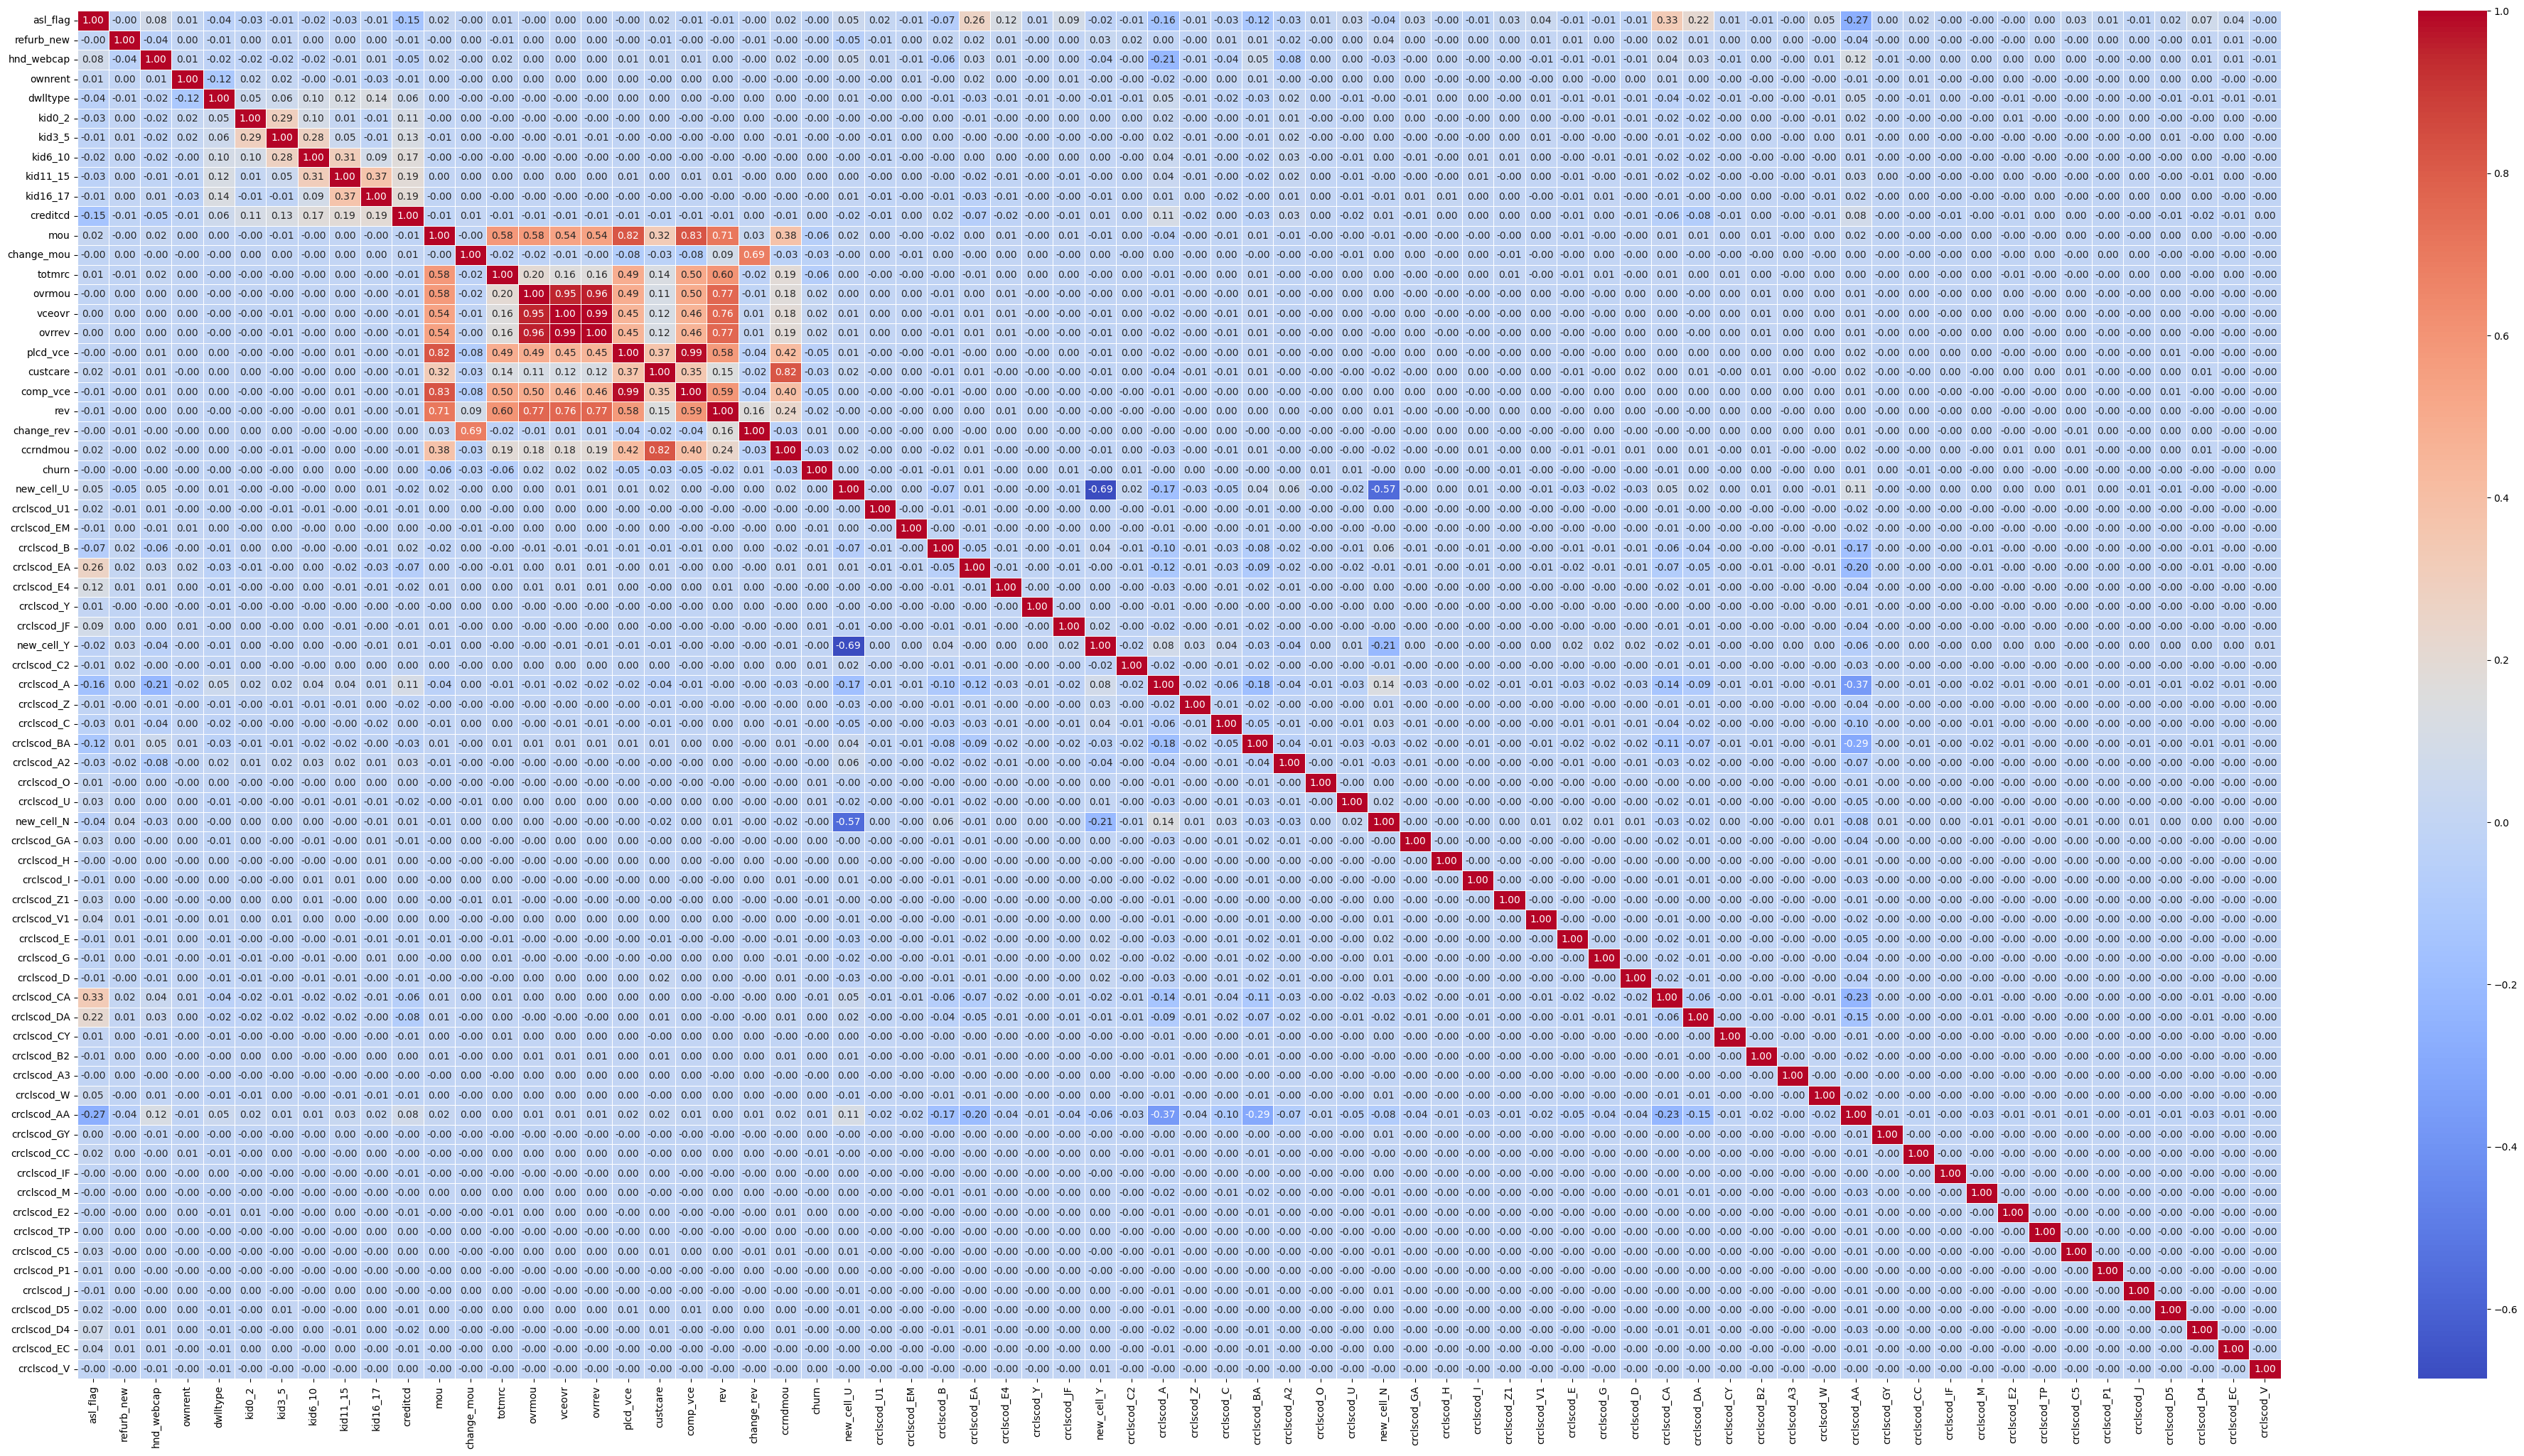

In [ ]:
plt.rcParams["figure.figsize"] = 50,25
sns.heatmap(corr,cmap='coolwarm',annot= True, fmt='.2f',linewidths=.5)

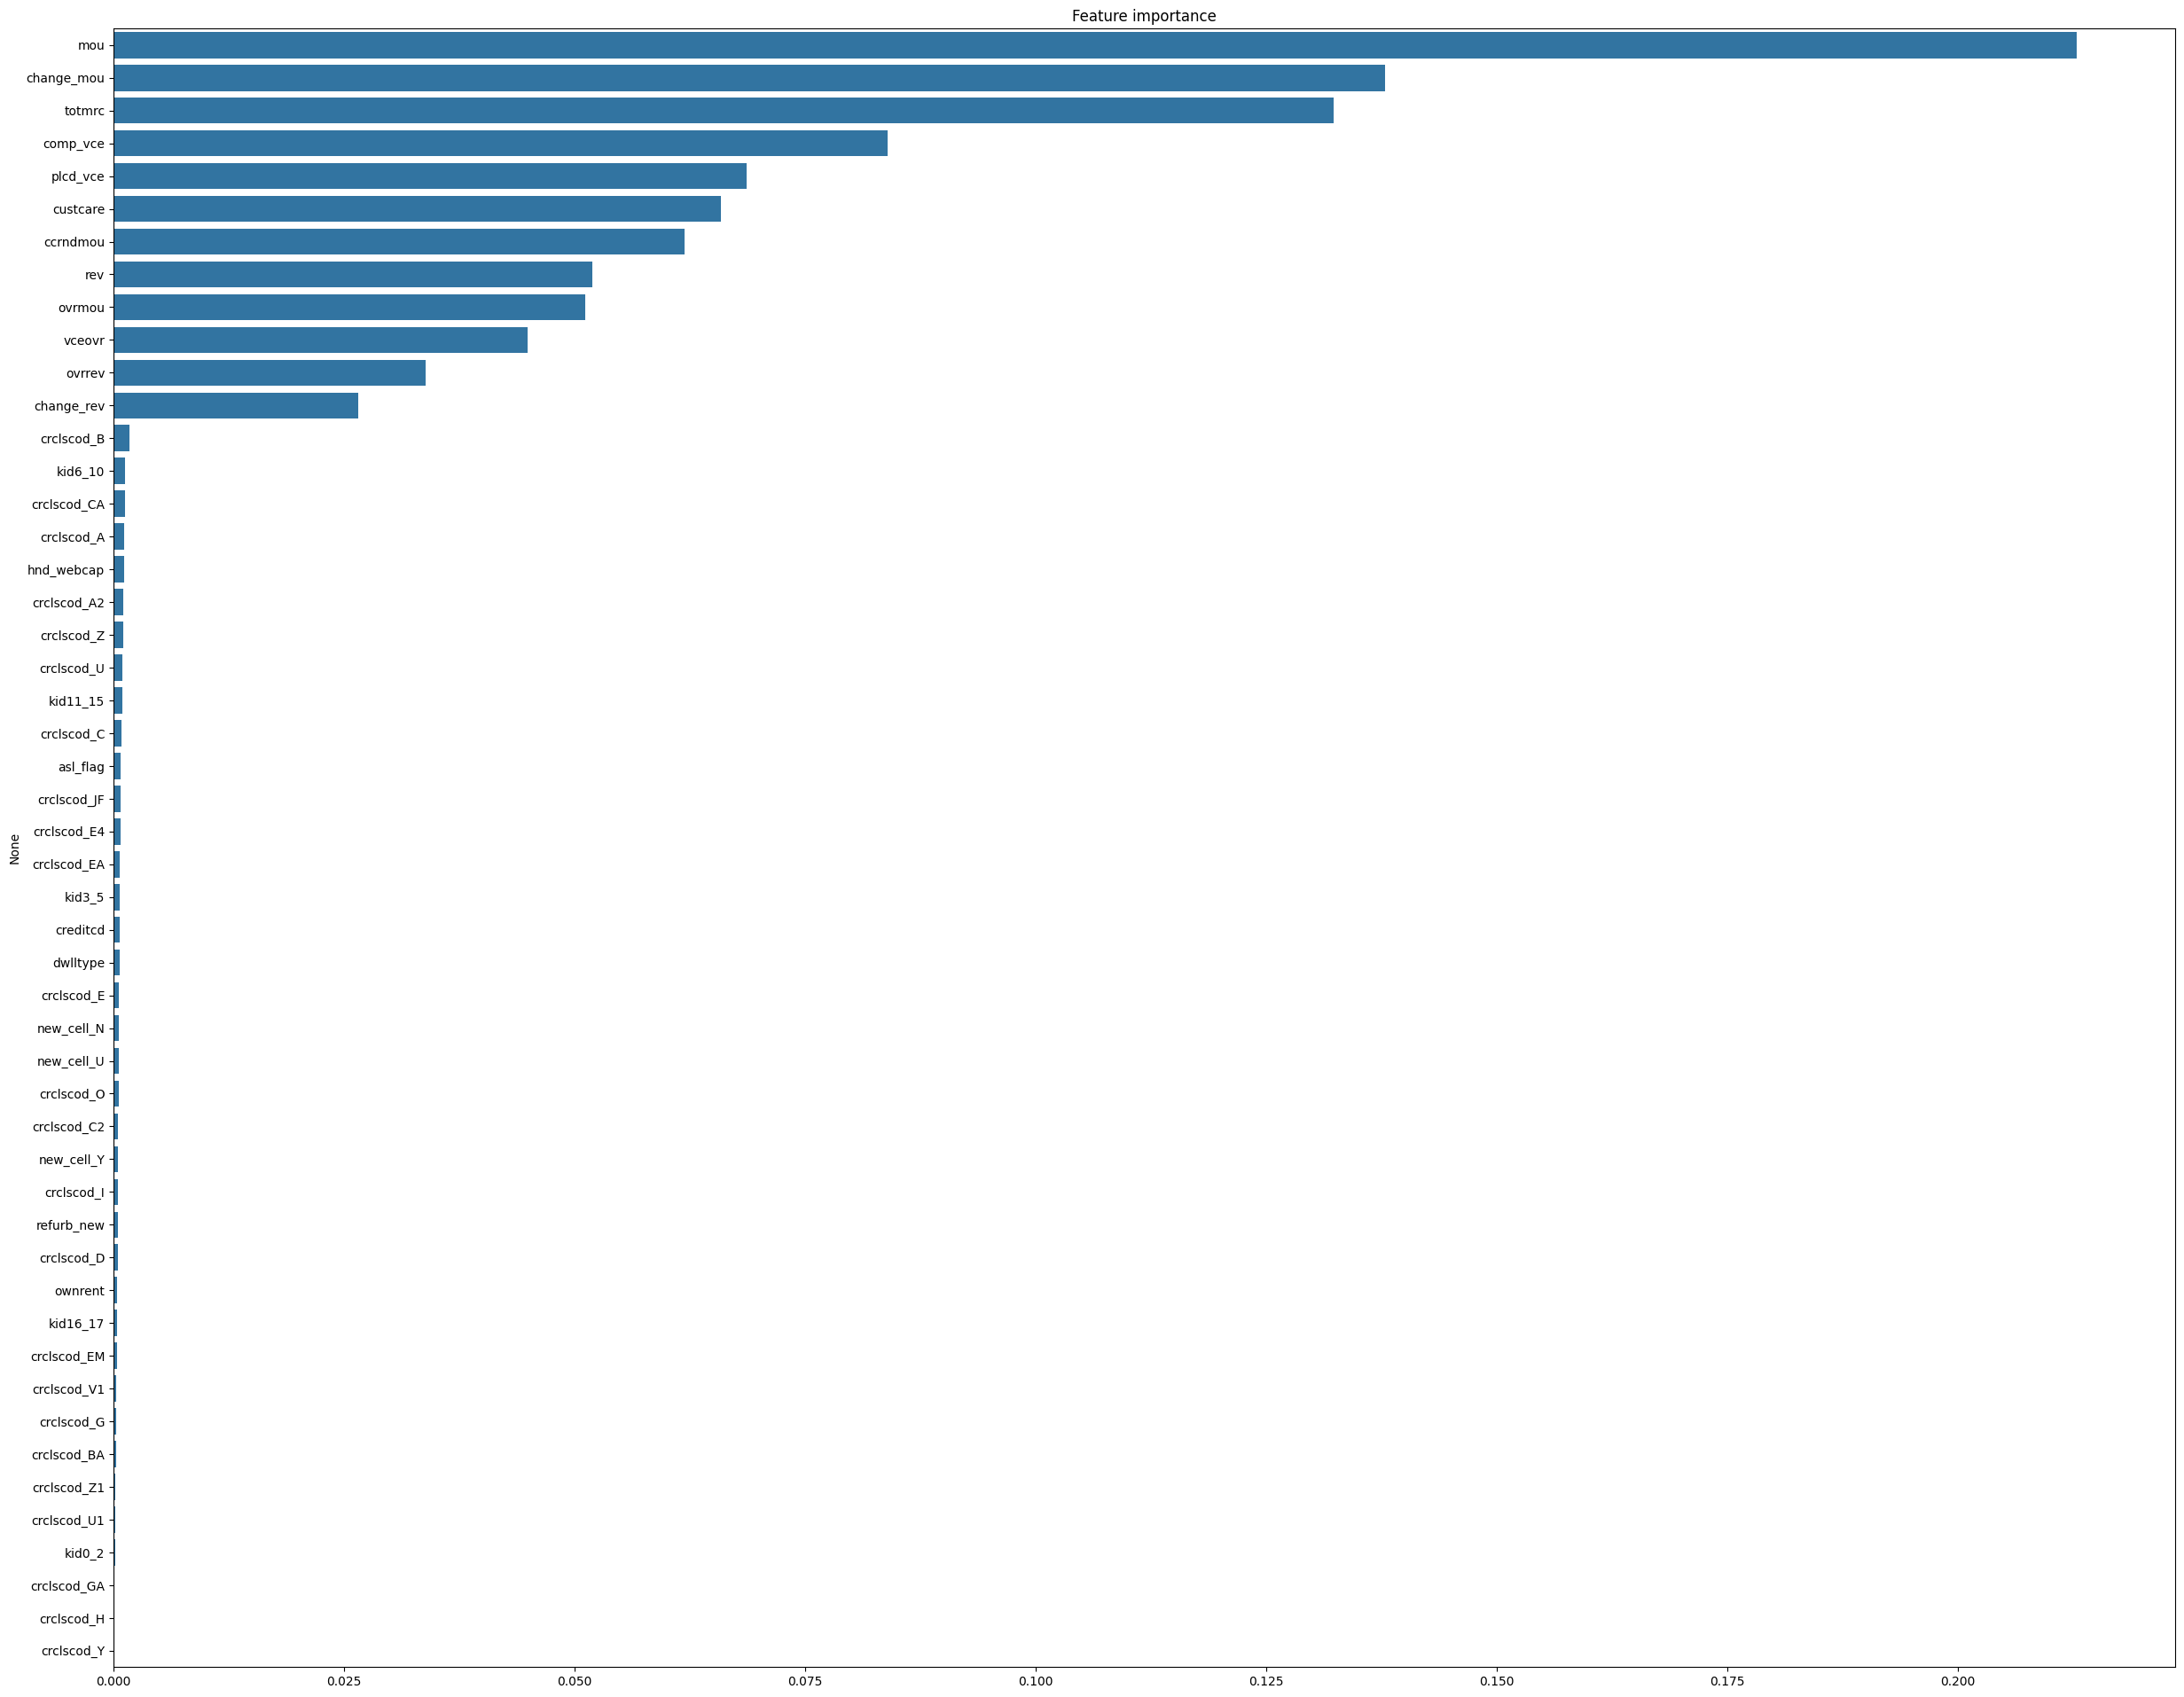

In [225]:
#feature importance One Hot Encoded Dataset
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}
# se entrena un RandomForest y se plotean las variables que tuvieron más importancia en el modelo
y = final_df2['churn']
x = final_df2.drop('churn' ,axis=1)
# entrena un RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plotea las 25 mejores Features importances
features = clf.feature_importances_[:50]
columnas = x.columns[:50]
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)
plt.figure(figsize=(30,24))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')
plt.show()

# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [234]:
# Calcular la matriz de correlación
corr_matrix = final_df2.corr().abs()

In [235]:
# Crear una máscara para obtener la matriz superior de correlación
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_corr_matrix = corr_matrix.where(upper_triangle)

In [236]:
# Encontrar pares de variables con alta correlación
threshold = 0.85
to_drop = [column for column in upper_corr_matrix.columns if any(upper_corr_matrix[column] > threshold)]

In [237]:
to_drop

['vceovr', 'ovrrev', 'comp_vce']

In [238]:
df_reduced = final_df2.drop(columns=to_drop)

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [239]:
# Umbral de variabilidad mínima
variability_threshold = 0.01

In [240]:
df_reduced.var()

asl_flag       0.094689
refurb_new     0.128099
hnd_webcap     0.137876
ownrent        0.028159
dwlltype       0.202768
                 ...   
crclscod_J     0.000261
crclscod_D5    0.000166
crclscod_D4    0.001054
crclscod_EC    0.000237
crclscod_V     0.000012
Length: 67, dtype: float64

In [242]:
low_variability_columns = df_reduced.columns[df_reduced.var() < variability_threshold]
# Mostrar las variables a eliminar
print("Variables eliminadas por baja variabilidad: \n", low_variability_columns.to_list())

Variables eliminadas por baja variabilidad: 
 ['mou', 'change_mou', 'totmrc', 'ovrmou', 'plcd_vce', 'custcare', 'rev', 'change_rev', 'ccrndmou', 'crclscod_U1', 'crclscod_EM', 'crclscod_E4', 'crclscod_Y', 'crclscod_JF', 'crclscod_C2', 'crclscod_Z', 'crclscod_A2', 'crclscod_O', 'crclscod_U', 'crclscod_GA', 'crclscod_H', 'crclscod_I', 'crclscod_Z1', 'crclscod_V1', 'crclscod_E', 'crclscod_G', 'crclscod_D', 'crclscod_CY', 'crclscod_B2', 'crclscod_A3', 'crclscod_W', 'crclscod_GY', 'crclscod_CC', 'crclscod_IF', 'crclscod_M', 'crclscod_E2', 'crclscod_TP', 'crclscod_C5', 'crclscod_P1', 'crclscod_J', 'crclscod_D5', 'crclscod_D4', 'crclscod_EC', 'crclscod_V']


In [243]:
# Eliminar las columnas con baja variabilidad
df_reduced = df_reduced.drop(columns=low_variability_columns)

In [245]:
# Mostrar el DataFrame reducido
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84379 entries, 0 to 84378
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   asl_flag     84379 non-null  float64
 1   refurb_new   84379 non-null  float64
 2   hnd_webcap   84379 non-null  float64
 3   ownrent      84379 non-null  float64
 4   dwlltype     84379 non-null  float64
 5   kid0_2       84379 non-null  float64
 6   kid3_5       84379 non-null  float64
 7   kid6_10      84379 non-null  float64
 8   kid11_15     84379 non-null  float64
 9   kid16_17     84379 non-null  float64
 10  creditcd     84379 non-null  float64
 11  churn        84379 non-null  float64
 12  new_cell_U   84379 non-null  float64
 13  crclscod_B   84379 non-null  float64
 14  crclscod_EA  84379 non-null  float64
 15  new_cell_Y   84379 non-null  float64
 16  crclscod_A   84379 non-null  float64
 17  crclscod_C   84379 non-null  float64
 18  crclscod_BA  84379 non-null  float64
 19  new_

In [246]:
corr = df_reduced.corr()

<Axes: >

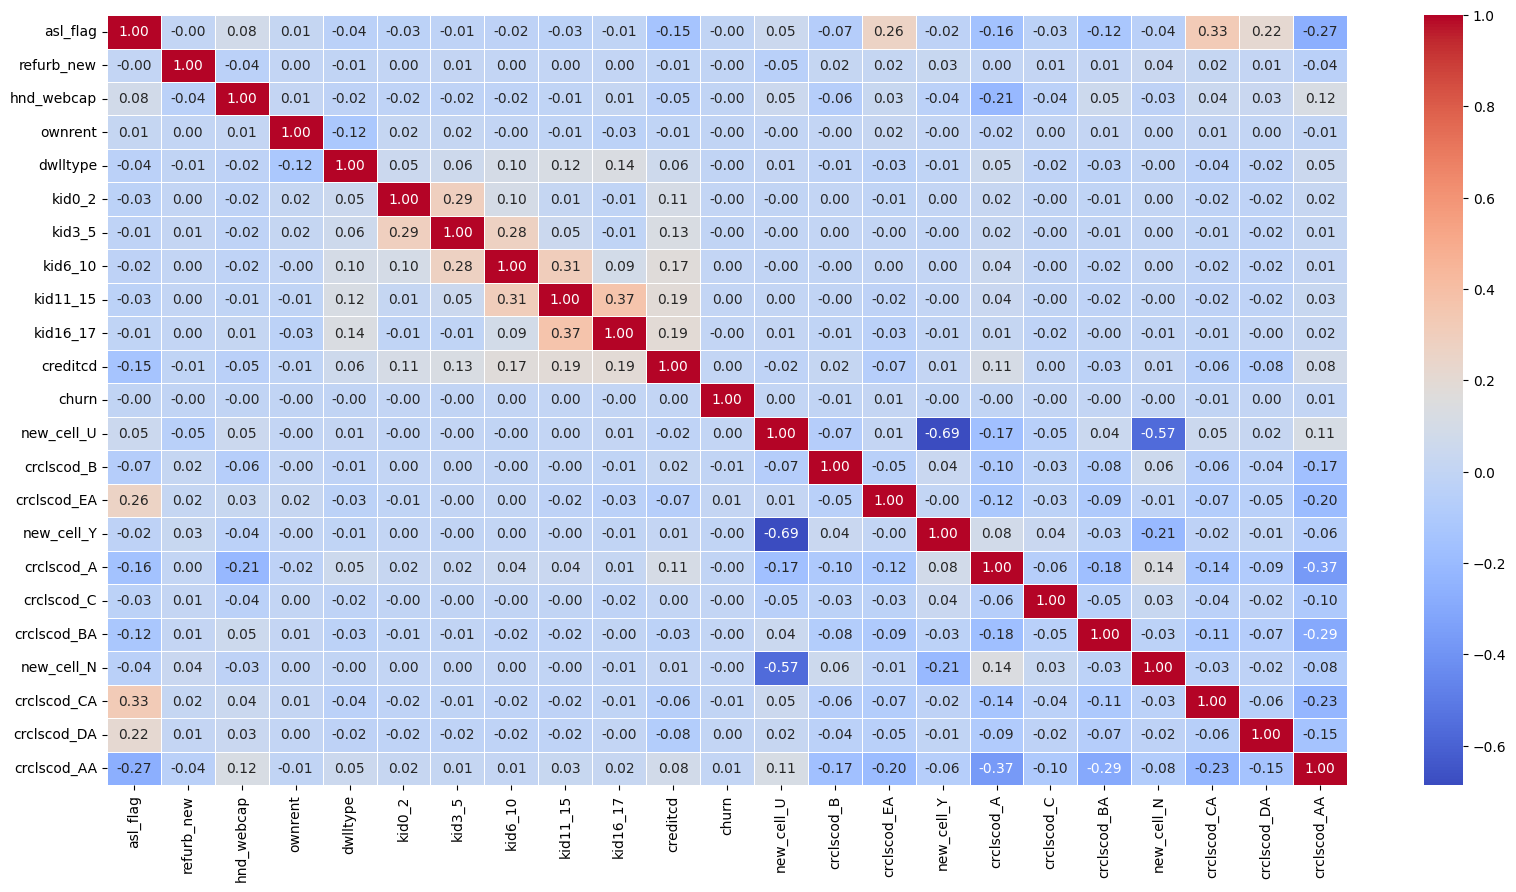

In [248]:
plt.rcParams["figure.figsize"] = 20,10
sns.heatmap(corr,cmap='coolwarm',annot= True, fmt='.2f',linewidths=.5)

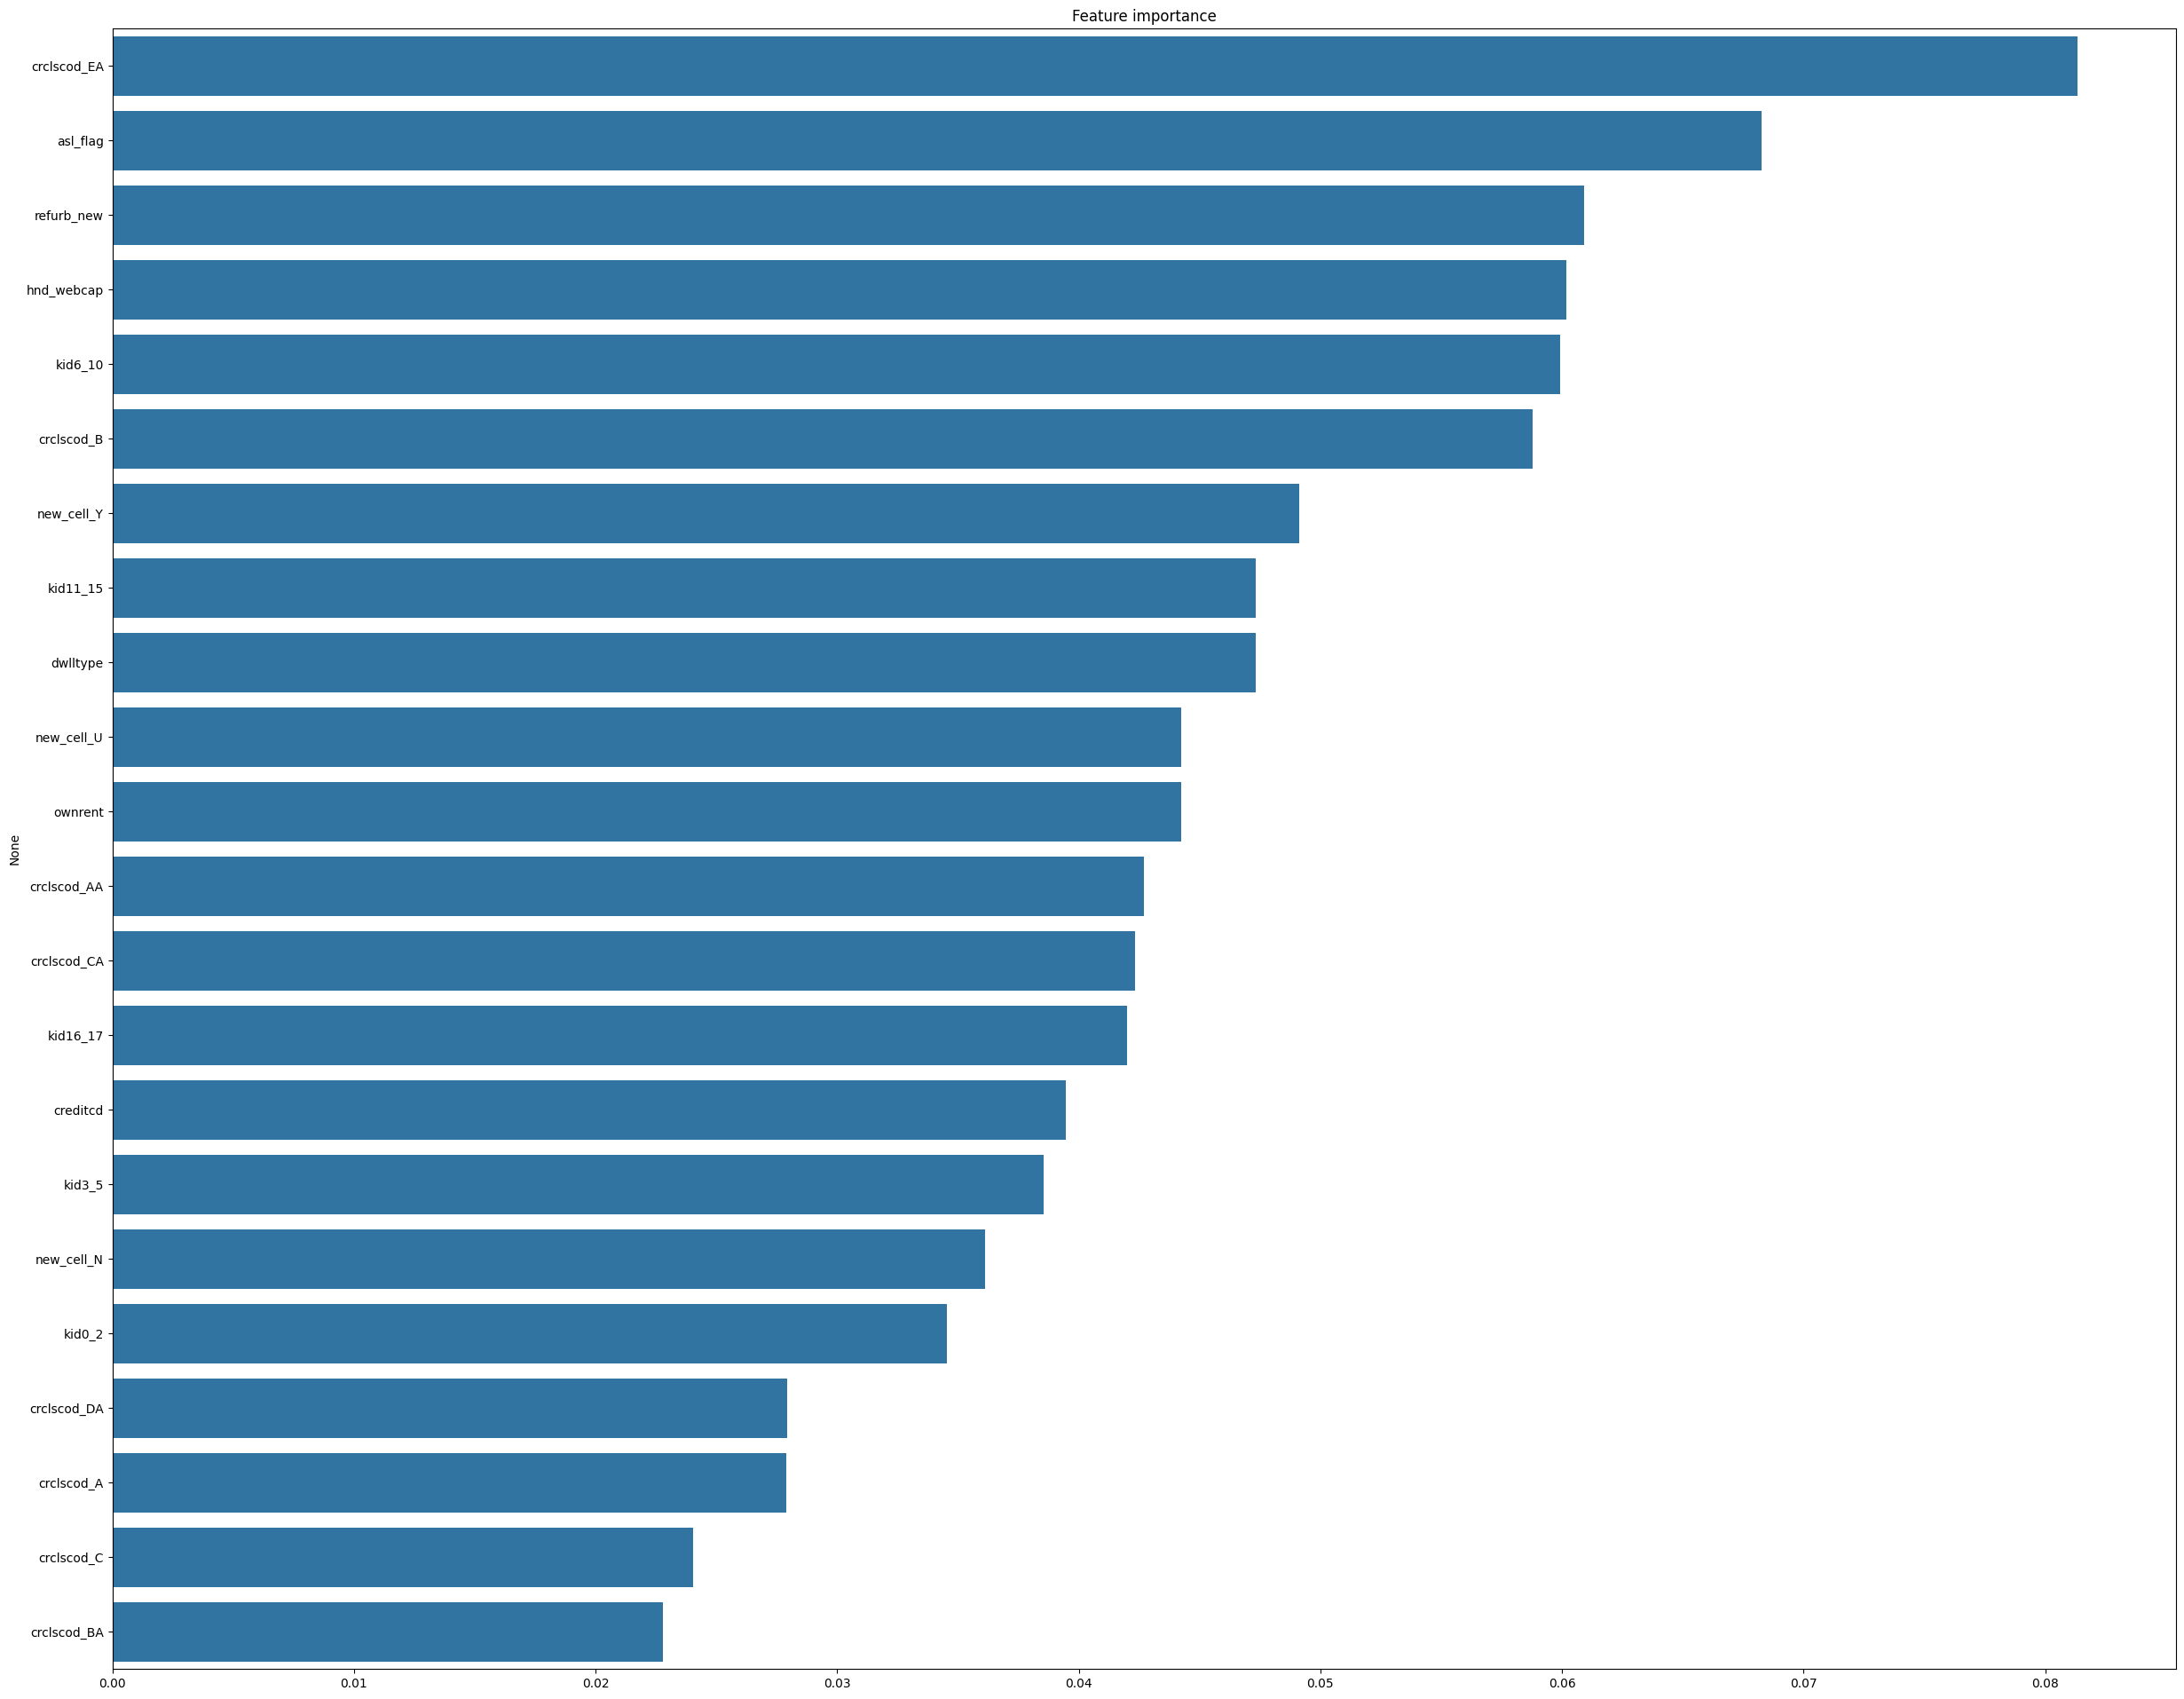

In [249]:
#feature importance One Hot Encoded Dataset
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}
# se entrena un RandomForest y se plotean las variables que tuvieron más importancia en el modelo
y = df_reduced['churn']
x = df_reduced.drop('churn' ,axis=1)
# entrena un RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plotea las 25 mejores Features importances
features = clf.feature_importances_[:50]
columnas = x.columns[:50]
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)
plt.figure(figsize=(30,24))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')
plt.show()

# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()